In [295]:
import mnist

mnist.init()


In [296]:
x_train, t_train, x_test, t_test = mnist.load()


In [297]:
x_train=x_train.T
t_train=t_train.T.reshape(1,-1)
x_test=x_test.T
t_test=t_test.reshape(1,-1)
print(x_train.shape)
print(t_train.shape)
print(x_test.shape)
print(t_test.shape)

(784, 60000)
(1, 60000)
(784, 10000)
(1, 10000)


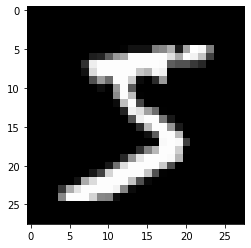

5


In [298]:
import matplotlib.pyplot as plt
img = x_train[:,0].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show()
print(t_train[0][0])

In [299]:
import numpy as np
x_train=x_train/255
x_test=x_test/255

y_train=np.zeros((10,60000))
y_test=np.zeros((10,10000))
print(y_train.shape)
print(y_test.shape)

(10, 60000)
(10, 10000)


In [300]:
#Converting the output into 10 by 1 for each input and place 1 which index corresponds to the ouput of the given image
for i in range(0,y_train.shape[1]):
    y_train[t_train[0][i]][i]=1
for i in range(0,y_test.shape[1]):
    y_test[t_test[0][i]][i]=1

In [301]:
# GRADED FUNCTION: sigmoid

def sigmoid(z):
    s=1/(1+np.exp(-z))
    return s

In [302]:
# GRADED FUNCTION: Relu

def relu(z):
    s=np.maximum(0,z)
    return s

In [303]:

def dev_relu(a):
    x=np.copy(a)
    x[x<=0] = 0
    x[x>0] = 1
    return x

In [304]:
# GRADED FUNCTION: Liky Relu

def likyrelu(z):
    s=np.maximum(0.01*z , z)
    return s

In [305]:

def dev_likyrelu(a):
    x=np.copy(a)
    x[x<0] = 0.01
    x[x>=0] = 1

    return x

In [306]:
# GRADED FUNCTION: initialize_parameters

def initialize_parameters(n_x, n_h, n_y):
    """
    Argument:
    n_x -- size of the input layer
    n_h -- size of the hidden layer
    n_y -- size of the output layer
    
    Returns:
    params -- python dictionary containing your parameters:
                    W1 -- weight matrix of shape (n_h, n_x)
                    b1 -- bias vector of shape (n_h, 1)
                    W2 -- weight matrix of shape (n_y, n_h)
                    b2 -- bias vector of shape (n_y, 1)
    """    
    W1=np.random.randn(n_h,n_x) * 0.01
    b1=np.zeros((n_h,1))
    W2=np.random.randn(n_y,n_h) * 0.01
    b2=np.zeros((n_y,1))

    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [307]:
# GRADED FUNCTION:forward_propagation

def forward_propagation(X, parameters):
    """
    Argument:
    X -- input data of size (n_x, m)
    parameters -- python dictionary containing your parameters (output of initialization function)
    
    Returns:
    A2 -- The sigmoid output of the second activation
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2"
    """
    # Retrieve each parameter from the dictionary "parameters"
    
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
 
    
    # Implement Forward Propagation to calculate A2 (probabilities)
    
    Z1=np.dot(W1,X)+b1
    A1=relu(Z1)
    Z2=np.dot(W2,A1)+b2
    A2=sigmoid(Z2)
   
    
    assert(A2.shape == (10, X.shape[1]))
    
    cache = {"Z1": Z1,
             "A1": A1,
             "Z2": Z2,
             "A2": A2}
    
    return A2, cache

In [308]:
def compute_cost(A2, Y):
    """
    Computes the cross-entropy cost given in equation (13)
    
    Arguments:
    A2 -- The sigmoid output of the second activation, of shape (1, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)

    Returns:
    cost -- cross-entropy cost given equation (13)
    
    """
    
    m = Y.shape[1] # number of examples

    # Compute the cross-entropy cost
   
    Logprobs=np.sum(np.multiply(Y,np.log(A2))+np.multiply((1-Y),np.log(1-A2)),axis=1,keepdims=True)
    Logprobs=Logprobs/10
    cost=(-1/m)*np.sum(Logprobs)
    
    
    cost = float(np.squeeze(cost))  # makes sure cost is the dimension we expect. 
                                    # E.g., turns [[17]] into 17 
    
    return cost

In [309]:
# GRADED FUNCTION: backward_propagation

def backward_propagation(parameters, cache, X, Y):
    """
    Implement the backward propagation using the instructions above.
    
    Arguments:
    parameters -- python dictionary containing our parameters 
    cache -- a dictionary containing "Z1", "A1", "Z2" and "A2".
    X -- input data of shape (2, number of examples)
    Y -- "true" labels vector of shape (1, number of examples)
    
    Returns:
    grads -- python dictionary containing your gradients with respect to different parameters
    """
    m = X.shape[1]
    
    # First, retrieve W1 and W2 from the dictionary "parameters".
    W1=parameters["W1"]
    W2=parameters["W2"]
    
    # Retrieve also A1 and A2 from dictionary "cache".
    A1=cache["A1"]
    A2=cache["A2"]
    
    
    # Backward propagation: calculate dW1, db1, dW2, db2. 
    dZ2=A2-Y/10
    dW2=np.dot(dZ2,A1.T)/m
    db2=np.sum(dZ2,axis=1,keepdims=True)/m
#     dZ1=np.dot(W2.T,dZ2)*(A1*(A1-1))
    
    dZ1=np.dot(W2.T,dZ2)*(dev_relu(A1))
#     dZ1=np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1=np.dot(dZ1,X.T)/m
    db1=np.sum(dZ1,axis=1,keepdims=True)/m
    
    grads = {"dW1": dW1,
             "db1": db1,
             "dW2": dW2,
             "db2": db2}
    
    return grads

In [310]:
# GRADED FUNCTION: update_parameters

def update_parameters(parameters, grads, learning_rate = 1.2):
    """
    Updates parameters using the gradient descent update rule given above
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    grads -- python dictionary containing your gradients 
    
    Returns:
    parameters -- python dictionary containing your updated parameters 
    """
    # Retrieve a copy of each parameter from the dictionary "parameters". Use copy.deepcopy(...) for W1 and W2
    W1=parameters["W1"]
    b1=parameters["b1"]
    W2=parameters["W2"]
    b2=parameters["b2"]
    
    # Retrieve each gradient from the dictionary "grads"
    dW1=grads["dW1"]
    db1=grads["db1"]
    dW2=grads["dW2"]
    db2=grads["db2"]
    
    # Update rule for each parameter
    W1=W1-learning_rate*dW1
    W2=W2-learning_rate*dW2
    b1=b1-learning_rate*db1
    b2=b2-learning_rate*db2
    
    parameters = {"W1": W1,
                  "b1": b1,
                  "W2": W2,
                  "b2": b2}
    
    return parameters

In [311]:
# GRADED FUNCTION: nn_model

def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    """
    Arguments:
    X -- dataset of shape (2, number of examples)
    Y -- labels of shape (1, number of examples)
    n_h -- size of the hidden layer
    num_iterations -- Number of iterations in gradient descent loop
    print_cost -- if True, print the cost every 1000 iterations
    
    Returns:
    parameters -- parameters learnt by the model. They can then be used to predict.
    """
    
    n_x = X.shape[0]
    n_y = Y.shape[0]
    
    # Initialize parameters
    #(≈ 1 line of code)
    # parameters = ...
    # YOUR CODE STARTS HERE
    
    parameters=initialize_parameters(n_x, n_h, n_y)
    # YOUR CODE ENDS HERE
    
    # Loop (gradient descent)

    for i in range(0, num_iterations):
         
        #(≈ 4 lines of code)
        # Forward propagation. Inputs: "X, parameters". Outputs: "A2, cache".
        # A2, cache = ...
        
        # Cost function. Inputs: "A2, Y". Outputs: "cost".
        # cost = ...
 
        # Backpropagation. Inputs: "parameters, cache, X, Y". Outputs: "grads".
        # grads = ...
 
        # Gradient descent parameter update. Inputs: "parameters, grads". Outputs: "parameters".
        # parameters = ...
        
        # YOUR CODE STARTS HERE
        A2,cache=forward_propagation(X, parameters)
        cost=compute_cost(A2, Y)
        grads=backward_propagation(parameters, cache, X, Y)
        parameters=update_parameters(parameters, grads, learning_rate = 1.2)
        # YOUR CODE ENDS HERE
        
        # Print the cost every 1000 iterations
        if print_cost and i % 100 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))

    return parameters

In [312]:
n_h=18
parameters=nn_model(x_train, y_train, n_h, num_iterations = 1000, print_cost=True)

Cost after iteration 0: 0.693203
Cost after iteration 100: 0.330347
Cost after iteration 200: 0.270665
Cost after iteration 300: 0.266274
Cost after iteration 400: 0.263818
Cost after iteration 500: 0.263339
Cost after iteration 600: 0.263430
Cost after iteration 700: 0.263608
Cost after iteration 800: 0.264457
Cost after iteration 900: 0.268681


In [343]:
def predict(parameters, X):
    """
    Using the learned parameters, predicts a class for each example in X
    
    Arguments:
    parameters -- python dictionary containing your parameters 
    X -- input data of size (n_x, m)
    
    Returns
    predictions -- vector of predictions of our model (red: 0 / blue: 1)
    """
    
    # Computes probabilities using forward propagation, and classifies to 0/1 using 0.5 as the threshold.
    #(≈ 2 lines of code)
    # A2, cache = ...
    # predictions = ...
    # YOUR CODE STARTS HERE
    
    A2,cahche=forward_propagation(X, parameters)
    
    prediction=np.zeros([10,10000])
    
    for i in range(0,A2.shape[1]):
        index=A2[:,i].argmax()
        prediction[index][i]=1
                        

    # YOUR CODE ENDS HERE
    return prediction

In [353]:
prediction=predict(parameters,x_test)
# print(A2.shape)
print(prediction[:,8000])
# print(y_test[:,0])

print("test accuracy: {} %".format(100 - np.mean(np.abs(prediction - y_test)) * 100))

[0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
test accuracy: 98.466 %


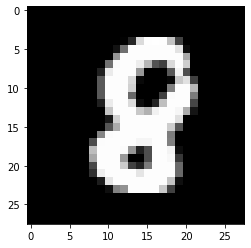

8


In [361]:
ind=8524
img = x_test[:,ind].reshape(28,28) # First image in the training set.
plt.imshow(img,cmap='gray')
plt.show()
print(prediction[:,ind].argmax())